In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Veriyi okuma ve gerekli sütunları bırakma
df = pd.read_csv('chicago_house_price.csv')
df = df.drop(columns=['Bedroom', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition'])

X = df[['Space', 'Room']].values  # Bağımsız değişkenler
Y = df['Price'].values  # Bağımlı değişken (Fiyat)

if Y.shape[0] > 146:
    # İlk 146 öğeyi seç
    Y = Y[:146]
    X = X[:146]
elif Y.shape[0] < 146:
    raise ValueError("Y'nin boyutu 146'dan az, X'i buna göre ayarlamak mümkün değil.")

df = df.replace([np.inf, -np.inf], np.nan).dropna()
df = df.dropna()
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Space', 'Room']])
m = len(Y)

In [17]:
# 2. Hipoztez fonksiyonu
def hypothesis_func(theta0, theta1, theta2, X):
    return theta0 + theta1 * X[:, 0] + theta2 * X[:, 1]

# 3. Gradient Descent fonksiyonu
def gradient_descent(X, Y, alpha, iterations):
    m = len(Y)

    # Başlangıç parametreleri (theta değerleri)
    theta0 = 0
    theta1 = 0
    theta2 = 0

    cost_history = np.zeros(iterations)

    for i in range(iterations):
        hypothesis_value = hypothesis_func(theta0, theta1, theta2, X)

        error = hypothesis_value - Y

        theta0 -= alpha * (1/m) * np.sum(error)
        theta1 -= alpha * (1/m) * np.sum(error * X[:, 0])
        theta2 -= alpha * (1/m) * np.sum(error * X[:, 1])

        cost_history[i] = (1/(2*m)) * np.sum(np.square(error))

        if np.isnan(theta0) or np.isnan(theta1) or np.isnan(theta2):
            print(f"NaN value detected at iteration {i}")
            break
        if i % 10 == 0:  # Her 10 iterasyonda bir yazdırma
          print(f"Iteration {i}: Cost {cost_history[i]}, Theta0: {theta0}, Theta1: {theta1}, Theta2: {theta2}")

    return theta0, theta1, theta2, cost_history

Training with learning rate: 0.001
Iteration 0: Cost 1695.3116438356165, Theta0: 0.05680136986301369, Theta1: 0.019009462664211937, Theta2: 0.018544520547945205
Iteration 10: Cost 1656.4464271621077, Theta0: 0.6210518882162286, Theta1: 0.20779310531571116, Theta2: 0.20271849376625453
Iteration 20: Cost 1618.5164788142624, Theta0: 1.1785182784678698, Theta1: 0.3942134089670628, Theta2: 0.38460077713644525
Iteration 30: Cost 1581.49928733555, Theta0: 1.729282645106414, Theta1: 0.5782990563692803, Theta2: 0.5642191665147882
Iteration 40: Cost 1545.372883117213, Theta0: 2.2734260985111745, Theta1: 0.7600783829197112, Theta2: 0.7416011211594398
Iteration 50: Cost 1510.11582535605, Theta0: 2.8110287669891973, Theta1: 0.9395793808679304, Theta2: 0.9167737678060887
Iteration 60: Cost 1475.7071893261218, Theta0: 3.3421698086664122, Theta1: 1.1168297034707046, Theta2: 1.0897639046942547
Iteration 70: Cost 1442.1265539568315, Theta0: 3.8669274232348045, Theta1: 1.2918566690966478, Theta2: 1.26059

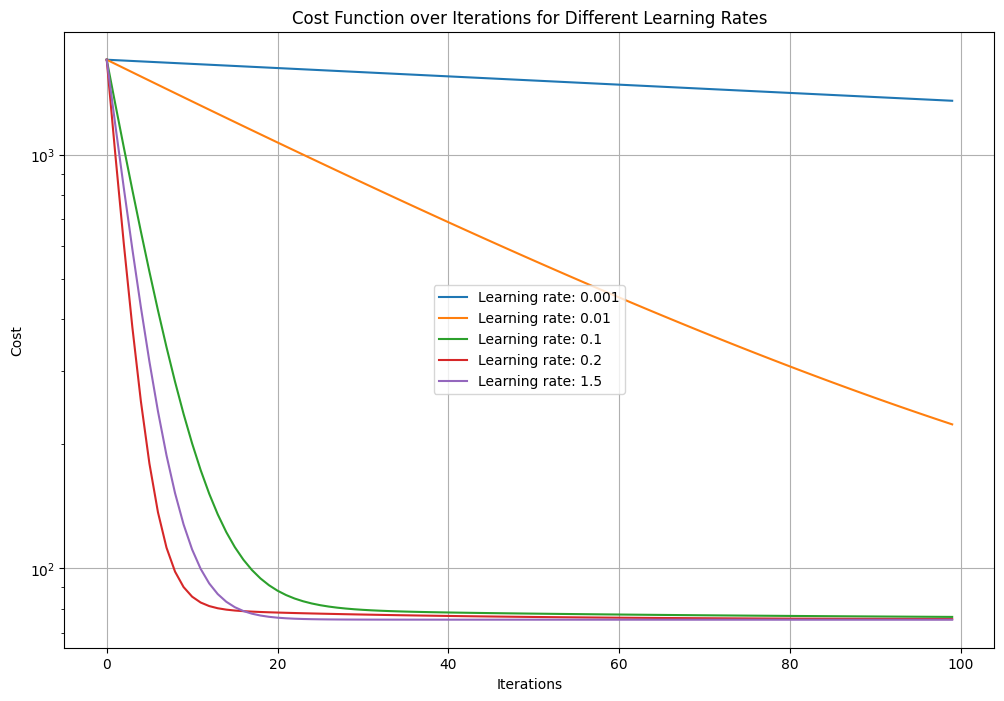

In [26]:
learning_rates = [0.001, 0.01, 0.1, 0.2,1.5]
n_iter = 100

cost_histories = {}

# Her öğrenme oranı için modeli eğit
for alpha in learning_rates:
    print(f"Training with learning rate: {alpha}")
    theta0, theta1, theta2, cost_history = gradient_descent(X, Y, alpha, n_iter)
    cost_histories[alpha] = cost_history

plt.figure(figsize=(12, 8))
for alpha, cost_history in cost_histories.items():
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning rate: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Different Learning Rates')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

Training with learning rate: 0.001
Iteration 0: Cost 1695.3116438356165, Theta0: 0.05680136986301369, Theta1: 0.019009462664211937, Theta2: 0.018544520547945205
Iteration 10: Cost 1656.4464271621077, Theta0: 0.6210518882162286, Theta1: 0.20779310531571116, Theta2: 0.20271849376625453
Iteration 20: Cost 1618.5164788142624, Theta0: 1.1785182784678698, Theta1: 0.3942134089670628, Theta2: 0.38460077713644525
Iteration 30: Cost 1581.49928733555, Theta0: 1.729282645106414, Theta1: 0.5782990563692803, Theta2: 0.5642191665147882
Iteration 40: Cost 1545.372883117213, Theta0: 2.2734260985111745, Theta1: 0.7600783829197112, Theta2: 0.7416011211594398
Iteration 50: Cost 1510.11582535605, Theta0: 2.8110287669891973, Theta1: 0.9395793808679304, Theta2: 0.9167737678060887
Iteration 60: Cost 1475.7071893261218, Theta0: 3.3421698086664122, Theta1: 1.1168297034707046, Theta2: 1.0897639046942547
Iteration 70: Cost 1442.1265539568315, Theta0: 3.8669274232348045, Theta1: 1.2918566690966478, Theta2: 1.26059

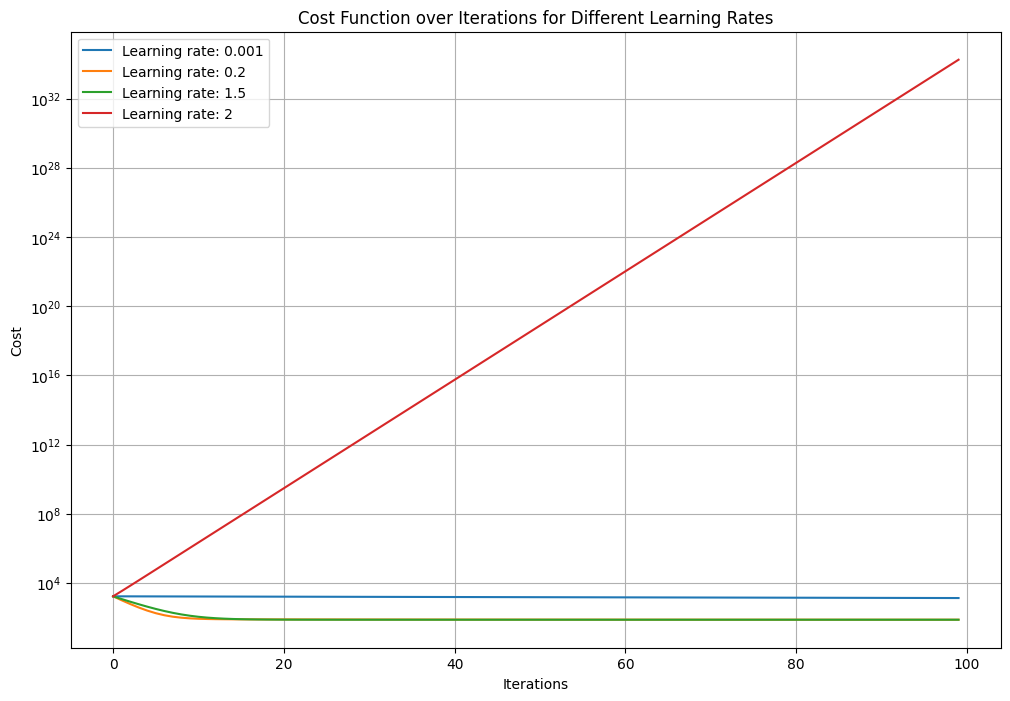

In [27]:
learning_rates = [0.001, 0.2,1.5, 2]
n_iter = 100

cost_histories = {}

# Her öğrenme oranı için modeli eğit
for alpha in learning_rates:
    print(f"Training with learning rate: {alpha}")
    theta0, theta1, theta2, cost_history = gradient_descent(X, Y, alpha, n_iter)
    cost_histories[alpha] = cost_history

plt.figure(figsize=(12, 8))
for alpha, cost_history in cost_histories.items():
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning rate: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations for Different Learning Rates')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()